In [1]:
import sys
!{sys.executable} -m pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/5d/6a/9669836f813b73fe5abf5e9f118ccc9b7fb060f02789d385825b0943f9c8/tensorflow-2.3.1-cp37-cp37m-win_amd64.whl
  Stored in directory: C:\Users\nourd\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built termcolor
  Found existing installation: h5py 2.9.0
    Uninstalling h5py-2.9.0:
      Successfully uninstalled h5py-2.9.0


In [1]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.3.1'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

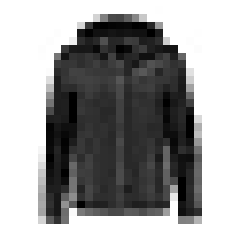

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [9]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

In [12]:

X_valid.shape

(5000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

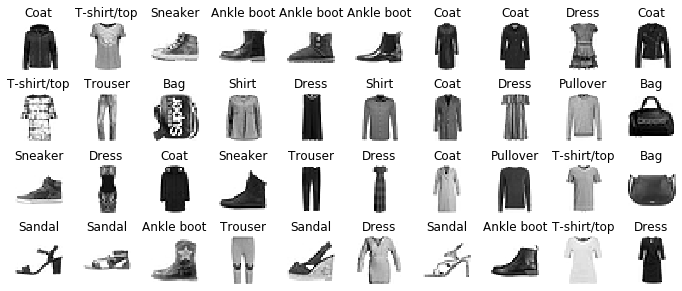

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [25]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [26]:
model.layers

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [28]:
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [29]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [30]:
model.get_layer(hidden1.name) is hidden1

True

In [31]:
weights, biases = hidden1.get_weights()

In [32]:
weights

array([[-0.05458051,  0.05825566,  0.04819103, ..., -0.04447811,
        -0.05187762,  0.05559249],
       [-0.03426343,  0.0423049 ,  0.05356167, ..., -0.02486161,
        -0.02104357, -0.05693725],
       [ 0.00350766, -0.06193115,  0.03776066, ..., -0.04923638,
         0.02827583, -0.06457638],
       ...,
       [ 0.00950919,  0.02543129,  0.06835546, ..., -0.0488802 ,
        -0.06557009, -0.06326349],
       [ 0.04185351,  0.0561509 ,  0.03213718, ...,  0.03664689,
        -0.00506864, -0.06944934],
       [-0.04761598,  0.07246175,  0.06989054, ..., -0.0077239 ,
        -0.00551896, -0.00664559]], dtype=float32)

In [33]:
weights.shape

(784, 300)

In [34]:

biases.shape

(300,)

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [36]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 25s 15ms/step - loss: 0.7263 - accuracy: 0.7623 - val_loss: 0.5304 - val_accuracy: 0.8194
Epoch 2/30
1719/1719 [==============================] - 17s 10ms/step - loss: 0.4889 - accuracy: 0.8303 - val_loss: 0.4411 - val_accuracy: 0.8504
Epoch 3/30
1719/1719 [==============================] - 19s 11ms/step - loss: 0.4452 - accuracy: 0.8442 - val_loss: 0.4069 - val_accuracy: 0.8628
Epoch 4/30
1719/1719 [==============================] - 19s 11ms/step - loss: 0.4178 - accuracy: 0.8534 - val_loss: 0.4050 - val_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3976 - accuracy: 0.8592 - val_loss: 0.3898 - val_accuracy: 0.8674
Epoch 6/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3807 - accuracy: 0.8654 - val_loss: 0.3696 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3669 - accuracy: 0.8696 - val_loss: 0.3771 - v

In [37]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [38]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

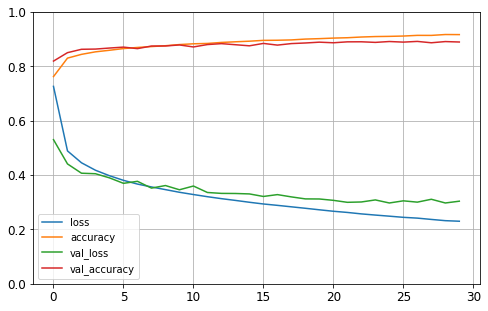

In [40]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [41]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3365 - accuracy: 0.8794


[0.33646029233932495, 0.8794000148773193]

In [42]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [43]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [44]:

np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [45]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

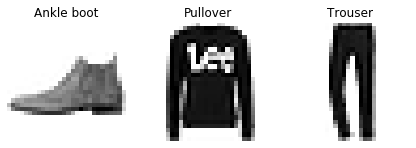

In [49]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Plot Learning curves when using different optimizers

Momentum optimizer

In [ ]:
Momentum optimiza‐tion:   cares a great deal about what previous gradients were: at
each iteration, it adds the local gradient to the momentum vector m (multiplied by the
learning rate η)

In [51]:
# we use in this case momentum = 0.9 ( in te previous example we have momentum = 0)
# lr= learning rate 
# deacy : Learning rate decay over each update
# nesterov: boolean. Whether to apply Nesterov momentum 


sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])

In [52]:
history = model.fit(X_train, y_train, batch_size=3, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
18334/18334 [==============================] - 76s 4ms/step - loss: 0.7302 - accuracy: 0.7355 - val_loss: 0.5748 - val_accuracy: 0.8062
Epoch 2/30
18334/18334 [==============================] - 68s 4ms/step - loss: 0.6082 - accuracy: 0.7893 - val_loss: 0.5880 - val_accuracy: 0.7918
Epoch 3/30
18334/18334 [==============================] - 72s 4ms/step - loss: 0.5768 - accuracy: 0.8022 - val_loss: 0.5511 - val_accuracy: 0.8118
Epoch 4/30
18334/18334 [==============================] - 72s 4ms/step - loss: 0.5621 - accuracy: 0.8108 - val_loss: 0.5930 - val_accuracy: 0.8344
Epoch 5/30
18334/18334 [==============================] - 79s 4ms/step - loss: 0.5523 - accuracy: 0.8191 - val_loss: 0.6069 - val_accuracy: 0.7900
Epoch 6/30
18334/18334 [==============================] - 77s 4ms/step - loss: 0.5365 - accuracy: 0.8209 - val_loss: 0.5184 - val_accuracy: 0.8272
Epoch 7/30
18334/18334 [==============================] - 73s 4ms/step - loss: 0.5491 - accuracy: 0.8195 - val_loss: 0

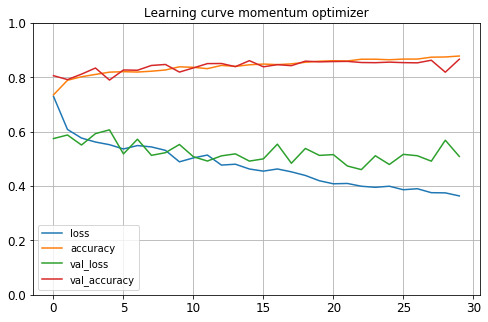

In [58]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.title("Learning curve momentum optimizer", fontsize=12)
plt.show()

Adam optimizer

In [59]:
Adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam,metrics=["accuracy"])

In [60]:
history3 = model.fit(X_train, y_train, batch_size=3, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
18334/18334 [==============================] - 82s 4ms/step - loss: 0.3271 - accuracy: 0.8895 - val_loss: 0.4429 - val_accuracy: 0.8758
Epoch 2/30
18334/18334 [==============================] - 89s 5ms/step - loss: 0.3034 - accuracy: 0.8942 - val_loss: 0.4242 - val_accuracy: 0.8792
Epoch 3/30
18334/18334 [==============================] - 78s 4ms/step - loss: 0.2981 - accuracy: 0.8930 - val_loss: 0.4063 - val_accuracy: 0.8784
Epoch 4/30
18334/18334 [==============================] - 81s 4ms/step - loss: 0.2908 - accuracy: 0.8971 - val_loss: 0.3956 - val_accuracy: 0.8858
Epoch 5/30
18334/18334 [==============================] - 82s 4ms/step - loss: 0.2874 - accuracy: 0.8972 - val_loss: 0.4053 - val_accuracy: 0.8850
Epoch 6/30
18334/18334 [==============================] - 82s 4ms/step - loss: 0.2851 - accuracy: 0.8986 - val_loss: 0.4429 - val_accuracy: 0.8786
Epoch 7/30
18334/18334 [==============================] - 81s 4ms/step - loss: 0.2843 - accuracy: 0.9006 - val_loss: 0

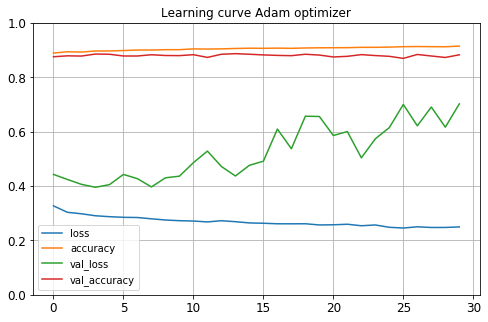

In [76]:
import pandas as pd

pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.title("Learning curve Adam optimizer", fontsize=12)
plt.show()

# Different batch size and different number of epochs